In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
for i in range(1,41):

  img = '/content/drive/My Drive/DataSet/plants/' + str(i) + '.jpg'

  print(img)



/content/drive/My Drive/DataSet/plants/1.jpg
/content/drive/My Drive/DataSet/plants/2.jpg
/content/drive/My Drive/DataSet/plants/3.jpg
/content/drive/My Drive/DataSet/plants/4.jpg
/content/drive/My Drive/DataSet/plants/5.jpg
/content/drive/My Drive/DataSet/plants/6.jpg
/content/drive/My Drive/DataSet/plants/7.jpg
/content/drive/My Drive/DataSet/plants/8.jpg
/content/drive/My Drive/DataSet/plants/9.jpg
/content/drive/My Drive/DataSet/plants/10.jpg
/content/drive/My Drive/DataSet/plants/11.jpg
/content/drive/My Drive/DataSet/plants/12.jpg
/content/drive/My Drive/DataSet/plants/13.jpg
/content/drive/My Drive/DataSet/plants/14.jpg
/content/drive/My Drive/DataSet/plants/15.jpg
/content/drive/My Drive/DataSet/plants/16.jpg
/content/drive/My Drive/DataSet/plants/17.jpg
/content/drive/My Drive/DataSet/plants/18.jpg
/content/drive/My Drive/DataSet/plants/19.jpg
/content/drive/My Drive/DataSet/plants/20.jpg
/content/drive/My Drive/DataSet/plants/21.jpg
/content/drive/My Drive/DataSet/plants/22.j

In [5]:
import cv2

import numpy as np

import glob


width=200
height=200


Data=[]

for i in range(1,41):

  img = '/content/drive/My Drive/DataSet/plants/' + str(i) + '.jpg'

  im=cv2.imread(img)

  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

  im=cv2.resize(im,(width,height))

  Data.append(im)


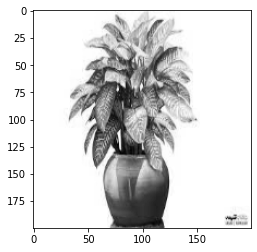

In [6]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Data[15])

plt.gray()

plt.show()

In [7]:
Target=[]

counter=1

idx_Class=0

for i in range(1,41):

  if(counter==21):

    counter=1

    idx_Class=idx_Class+1

  Target.append(idx_Class)

  counter=counter+1

In [8]:
plants_List=['difen bakhi','aloevera']

In [9]:
for i in range(0,40):

  print('Class ' + str(Target[i]) + '---> ' + plants_List[Target[i]])

Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 0---> difen bakhi
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera
Class 1---> aloevera


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, random_state=22)

In [11]:
import numpy as np

In [12]:
X_train=np.array(X_train)

X_test=np.array(X_test)

In [13]:
X_train = X_train.reshape(len(X_train), width*height)

X_test = X_test.reshape(len(X_test), width*height)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier_Knn = KNeighborsClassifier(n_neighbors=3)
classifier_Knn.fit(X_train, y_train)
Out_Knn=classifier_Knn.predict(X_test)

[[4 1]
 [3 4]]
 


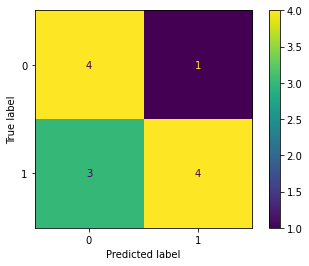

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

print(confusion_matrix(y_test,Out_Knn))

print(' ')

cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_Knn))

cm_display.plot()

plt.show()

In [17]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy= ' + str(round(accuracy_score(y_test, Out_Knn)*100)))


Accuracy= 67


In [18]:
print(classification_report(y_test,Out_Knn))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



In [19]:
from sklearn import svm

classifier_svm = svm.LinearSVC()

classifier_svm.fit(X_train, y_train)

Out_SVM=classifier_svm.predict(X_test)

[[5 0]
 [3 4]]
 


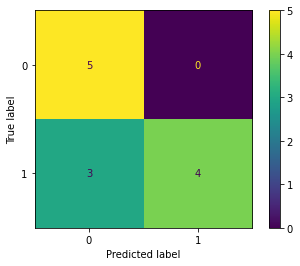

In [20]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

print(confusion_matrix(y_test,Out_SVM))

print(' ')

cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_SVM))

cm_display.plot()
plt.show()

In [21]:
print('Accuracy= ' + str(round(accuracy_score(y_test, Out_SVM)*100)))

Accuracy= 75


In [ ]:
print(classification_report(y_test,Out_SVM))

NameError: ignored

In [22]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()

classifier_tree.fit(X_train, y_train)

Out_TREE=classifier_tree.predict(X_test)

[[3 2]
 [0 7]]
 


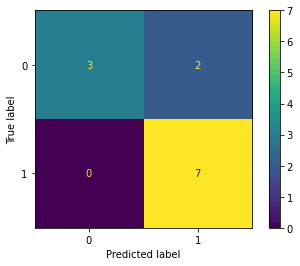

In [23]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

print(confusion_matrix(y_test,Out_TREE))

print(' ')

cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_TREE))

cm_display.plot()
plt.show()

In [24]:
print('Accuracy= ' + str(round(accuracy_score(y_test, Out_TREE)*100)))

Accuracy= 83


In [25]:
print(classification_report(y_test,Out_TREE))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.78      1.00      0.88         7

    accuracy                           0.83        12
   macro avg       0.89      0.80      0.81        12
weighted avg       0.87      0.83      0.82        12

